In [38]:
a = np.array([1,2,3])
a[1:3]
a[slice(0,2)]

array([1, 2])

In [47]:
b = 1
a = [x for x in range(3) if x != b]
a
c = np.array([[1,2,3],[4,5,6]]).T
c[a]

array([[1, 4],
       [3, 6]])

In [53]:
np.rint(np.array([1.5,6.4]),dtype=int)

TypeError: No loop matching the specified signature and casting was found for ufunc rint

In [56]:
arr = np.array([1.5,2.3,6.74])
np.round(arr).astype(int)

array([2, 2, 7])

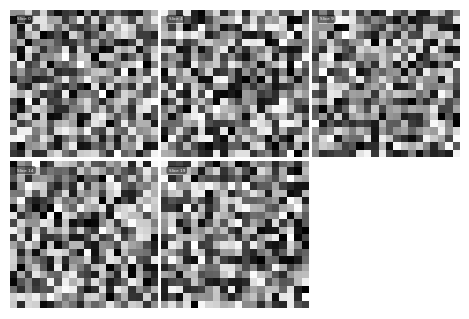

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Create a 3D volume with random data
volume = np.random.rand(20, 20, 20)  # Larger volume for a more detailed example

def display_slices(volume, axis=0, slices=None, rows=1, cols=None, slice_range=(None, None), fig_scale=1.0, include_endpoints=False, magnify=1.0, show=True):
    num_slices = volume.shape[axis]

    # Extract start and end from slice_range
    slice_start, slice_end = slice_range
    if slice_start is None:
        slice_start = 0
    if slice_end is None:
        slice_end = num_slices - 1

    if slices is None:
        slices = np.linspace(slice_start, slice_end, 5, dtype=int)
    if isinstance(slices, int):
        if include_endpoints:
            slices = np.linspace(slice_start, slice_end, slices, dtype=int)
        else:
            # Adjust the range to skip the very first and last points
            step = (slice_end - slice_start) / (slices + 1)
            new_start = slice_start + step
            new_end = slice_end - step
            slices = np.linspace(new_start, new_end, slices, dtype=int)

    total_slices = len(slices)

    if cols is None:
        # Calculate columns based on the number of rows and total slices
        cols = (total_slices + rows - 1) // rows  # Ceiling division

    # Adjust figure size based on the fig_scale parameter
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3 * fig_scale, rows * 3 * fig_scale), squeeze=False)

    for i, slice_num in enumerate(slices):
        if magnify > 1.0:
            other_axes = [x for x in range(3) if x != axis]
            center = np.array(np.array(volume.shape)[other_axes]) // 2
            length = np.array(np.array(volume.shape)[other_axes]) // magnify
            min_idx = np.round(center - length // 2).astype(int)
            max_idx = np.round(center + length // 2).astype(int)

            if axis == 0:
                slice_data = volume[slice_num, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
            elif axis == 1:
                slice_data = volume[min_idx[0]:max_idx[0], slice_num, min_idx[1]:max_idx[1]]
            else:
                slice_data = volume[min_idx[0]:max_idx[0], min_idx[1]:max_idx[1], slice_num]
        else:
            if axis == 0:
                slice_data = volume[slice_num, :, :]
            elif axis == 1:
                slice_data = volume[:, slice_num, :]
            else:
                slice_data = volume[:, :, slice_num]

        ax = axs[i // cols, i % cols]
        ax.imshow(slice_data, cmap='gray')
        ax.axis('off')
        # Set subtitle in the upper left corner with a background
        ax.text(0.05, 0.95, f'Slice {slice_num}', color='white', ha='left', va='top', fontsize=12 * fig_scale * 0.5, 
                transform=ax.transAxes, bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Hide any extra axes if there are more subplots than slices
    for j in range(i + 1, rows * cols):
        axs[j // cols, j % cols].axis('off')

    pad_size = 0.5
    plt.tight_layout(pad=0, h_pad= pad_size*fig_scale, w_pad=pad_size*fig_scale)
    if show: plt.show()
    

# Example usage:
display_slices(volume, axis=0, slices=None, rows=2, fig_scale=0.5)  # Scales the figure size and text by 1.5
# display_slices(volume, axis=0, slices=8, rows=2, slice_range=(2, 18), fig_scale=0.5)  # Scales figure size and text by 2.0
# display_slices(volume, axis=0, slices=[2,5,12,13,6], rows=2, fig_scale=1.0)  # Scales figure size and text by 2.0


In [2]:
def display_slices2(volume, slice_info, rows=1, cols=None, fig_scale=1.0, magnify=1.0, show=True):
    if cols is None:
        # Calculate columns based on the number of rows and total slices
        cols = (len(slice_info) + rows - 1) // rows  # Ceiling division

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3 * fig_scale, rows * 3 * fig_scale), squeeze=False)

    for i, (axis, slice_num) in enumerate(slice_info):
        if magnify > 1.0:
            other_axes = [x for x in range(3) if x != axis]
            center = np.array([volume.shape[ax] // 2 for ax in other_axes])
            length = np.array([volume.shape[ax] // magnify for ax in other_axes])
            min_idx = np.round(center - length // 2).astype(int)
            max_idx = np.round(center + length // 2).astype(int)

            if axis == 0:
                slice_data = volume[slice_num, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
            elif axis == 1:
                slice_data = volume[min_idx[0]:max_idx[0], slice_num, min_idx[1]:max_idx[1]]
            else:
                slice_data = volume[min_idx[0]:max_idx[0], min_idx[1]:max_idx[1], slice_num]
        else:
            if axis == 0:
                slice_data = volume[slice_num, :, :]
            elif axis == 1:
                slice_data = volume[:, slice_num, :]
            else:
                slice_data = volume[:, :, slice_num]

        ax = axs.flatten()[i]
        ax.imshow(slice_data, cmap='gray')
        ax.axis('off')
        # Set subtitle in the upper left corner with a background
        ax.text(0.05, 0.95, f'Axis {axis}, Slice {slice_num}', color='white', ha='left', va='top', 
                fontsize=12 * fig_scale * 0.5, transform=ax.transAxes, 
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))

    # Hide any extra axes if there are more subplots than slices
    for j in range(i + 1, rows * cols):
        axs.flatten()[j].axis('off')

    pad_size = 0.5
    plt.tight_layout(pad=0, h_pad=pad_size * fig_scale, w_pad=pad_size * fig_scale)
    if show: plt.show()

In [3]:
def display_slices3(vol1, vol2, slice_info, fig_scale=1.0, magnify=1.0, show=True):
    rows = len(slice_info)
    cols = 2  # Since we want to compare two volumes side by side

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3 * fig_scale, rows * 3 * fig_scale), squeeze=False)

    for i, (axis, slice_num) in enumerate(slice_info):
        for j, volume in enumerate([vol1, vol2]):
            if magnify > 1.0:
                other_axes = [x for x in range(3) if x != axis]
                center = np.array([volume.shape[ax] // 2 for ax in other_axes])
                length = np.array([volume.shape[ax] // magnify for ax in other_axes])
                min_idx = np.round(center - length // 2).astype(int)
                max_idx = np.round(center + length // 2).astype(int)

                if axis == 0:
                    slice_data = volume[slice_num, min_idx[0]:max_idx[0], min_idx[1]:max_idx[1]]
                elif axis == 1:
                    slice_data = volume[min_idx[0]:max_idx[0], slice_num, min_idx[1]:max_idx[1]]
                else:
                    slice_data = volume[min_idx[0]:max_idx[0], min_idx[1]:max_idx[1], slice_num]
            else:
                if axis == 0:
                    slice_data = volume[slice_num, :, :]
                elif axis == 1:
                    slice_data = volume[:, slice_num, :]
                else:
                    slice_data = volume[:, :, slice_num]

            ax = axs[i, j]
            ax.imshow(slice_data, cmap='gray')
            ax.axis('off')
            # Set subtitle in the upper left corner with a background
            ax.text(0.05, 0.95, f'Axis {axis}, Slice {slice_num}', color='white', ha='left', va='top', 
                    fontsize=12 * fig_scale * 0.5, transform=ax.transAxes, 
                    bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.5'))
    
    pad_size = 0.5
    plt.tight_layout(pad=0, h_pad=pad_size * fig_scale, w_pad=pad_size * fig_scale)
    if show: plt.show()

In [4]:
import pickle
import os

In [5]:
base_dir = os.path.abspath('/dtu/3d-imaging-center/projects/2022_DANFIX_Vindelev/analysis/s214743_bsc/')

file_path = os.path.join(base_dir,'bjobs/X20_bhc_recon_full.pkl')
with open(file_path, 'rb') as file:
    recon_bhc = pickle.load(file)

In [6]:
file_path = os.path.join(base_dir,'bjobs/X20_recon_full.pkl')
with open(file_path, 'rb') as file:
    recon = pickle.load(file)

In [7]:
from cil.framework.framework import ImageData, ImageGeometry

In [7]:
recon_bhc.shape, recon.shape

((1000, 1000, 1000), (800, 1000, 1000))

In [8]:
print(recon)

Number of dimensions: 3
Shape: (800, 1000, 1000)
Axis labels: ('vertical', 'horizontal_y', 'horizontal_x')



In [9]:
recon_bhc.as_array()[100:-100].shape

(800, 1000, 1000)

In [26]:
from cil.utilities.jupyter import islicer
islicer(recon, origin='upper-right',direction=2,size=(10,10))

In [8]:
new_ig = recon_bhc.geometry
new_ig.voxel_num_z = 800
recon_bhc = ImageData(array=recon_bhc.as_array()[100:-100], geometry=new_ig)

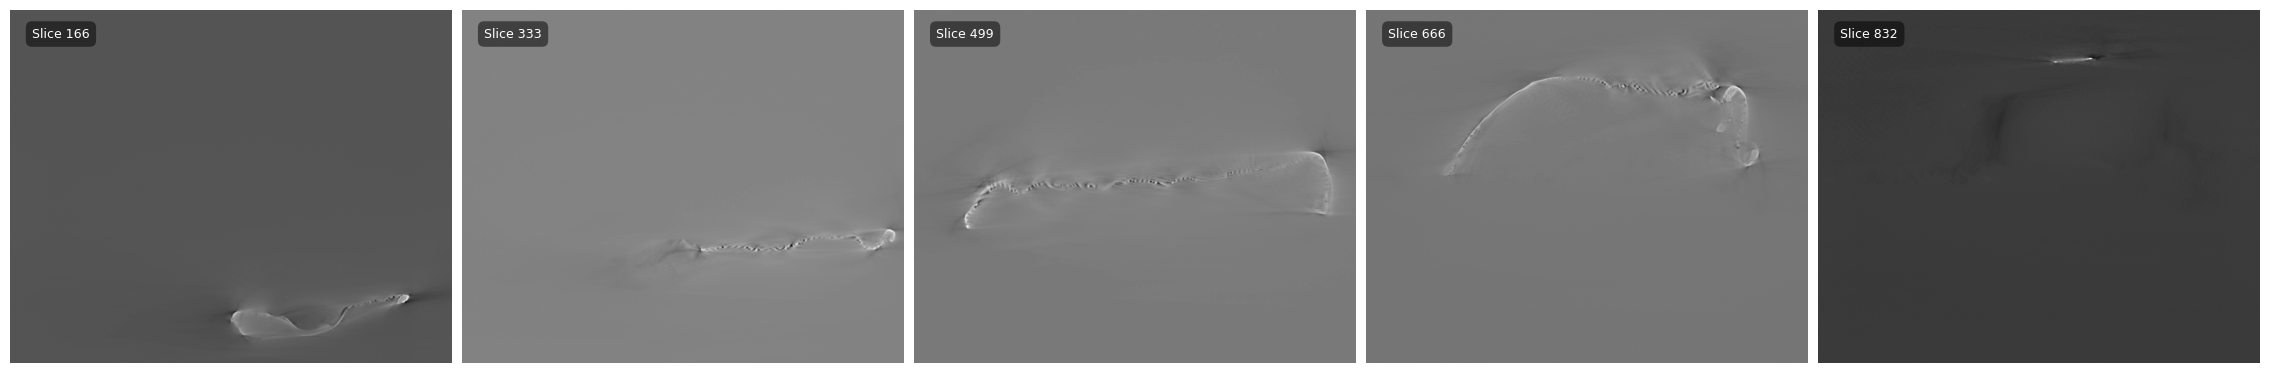

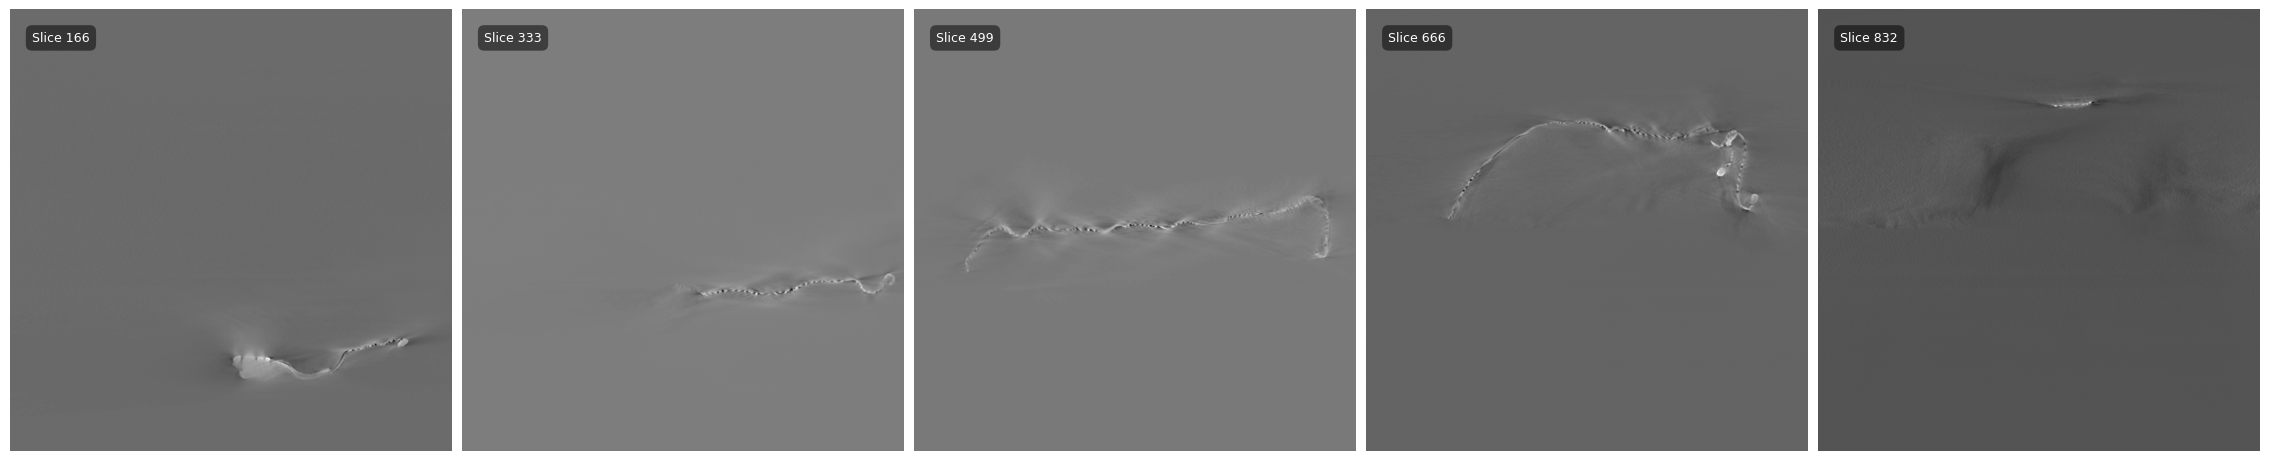

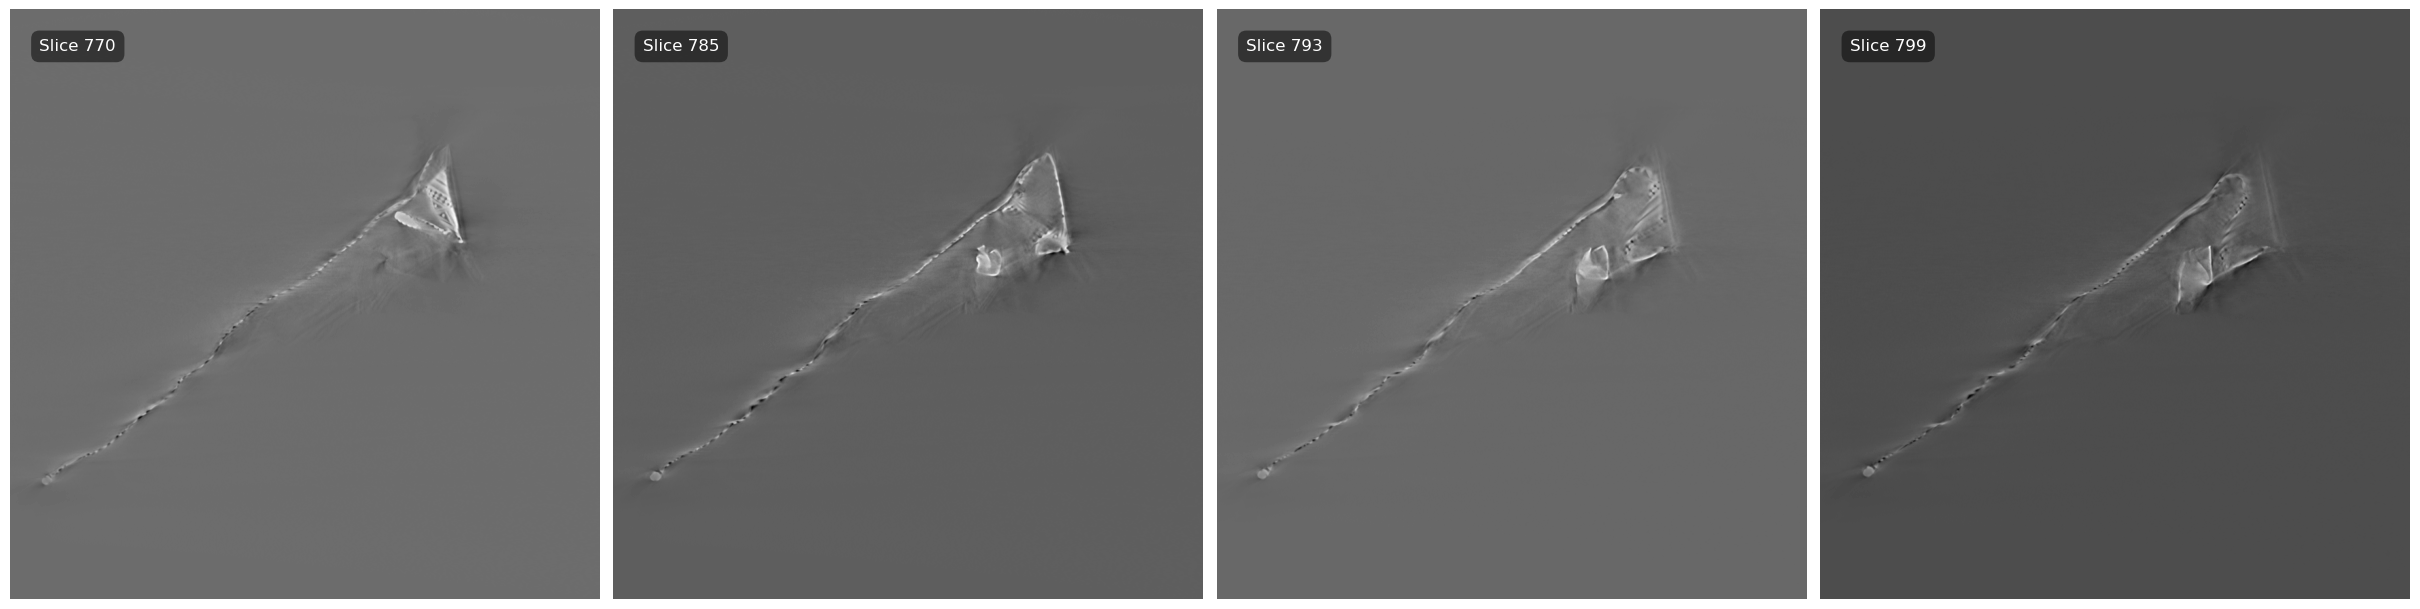

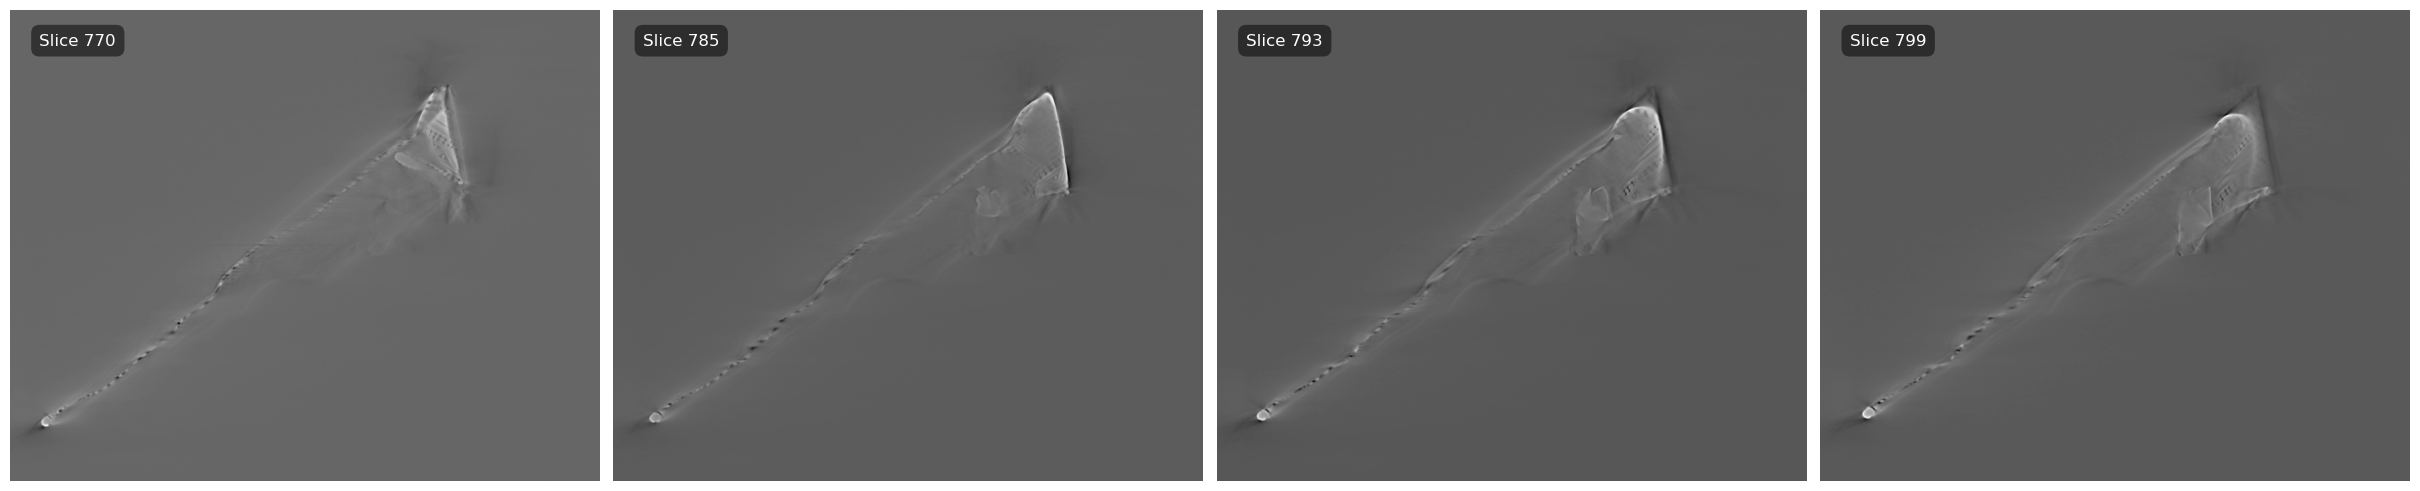

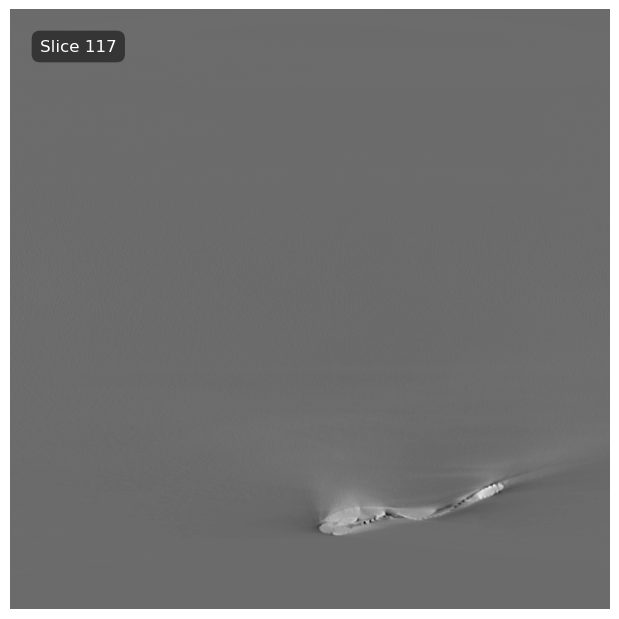

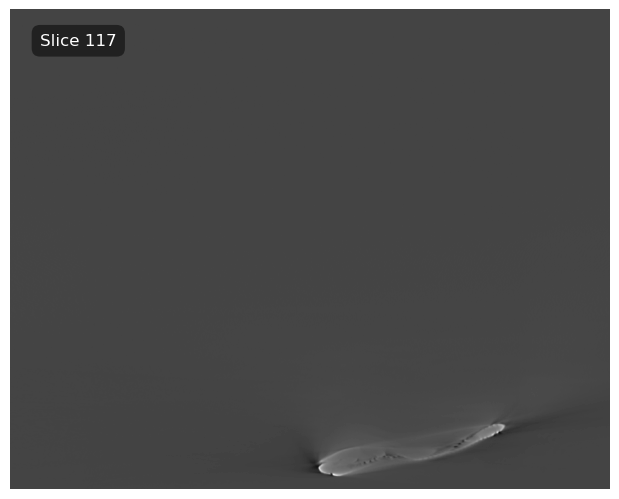

In [25]:
axis=1
slices=5
# slices = [380,385]
rows=1
fig_scale=1.5
magnify=1.15
# np.transpose(recon.as_array(), axes=(1,0,2))
display_slices(recon.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)
display_slices(recon_bhc.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)
# display_slices(recon.as_array(), axis=2, slices=5, rows=rows, fig_scale=fig_scale, magnify=magnify, slice_range=(450,500))
# display_slices(recon.as_array(), axis=0, slices=[475,479,500], rows=rows, fig_scale=2.0, magnify=magnify)

# axis = 2
# slices = [666,700]
# fig_scale = 2.0
# display_slices(recon_bhc.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)
# display_slices(recon.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)

axis = 2
slices = [770,785,793,799]
fig_scale = 2.0
display_slices(recon_bhc.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)
display_slices(recon.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)

axis = 1
slices = [117]
fig_scale = 2.0
display_slices(recon_bhc.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)
display_slices(recon.as_array(), axis=axis, slices=slices, rows=rows, fig_scale=fig_scale, magnify=magnify)

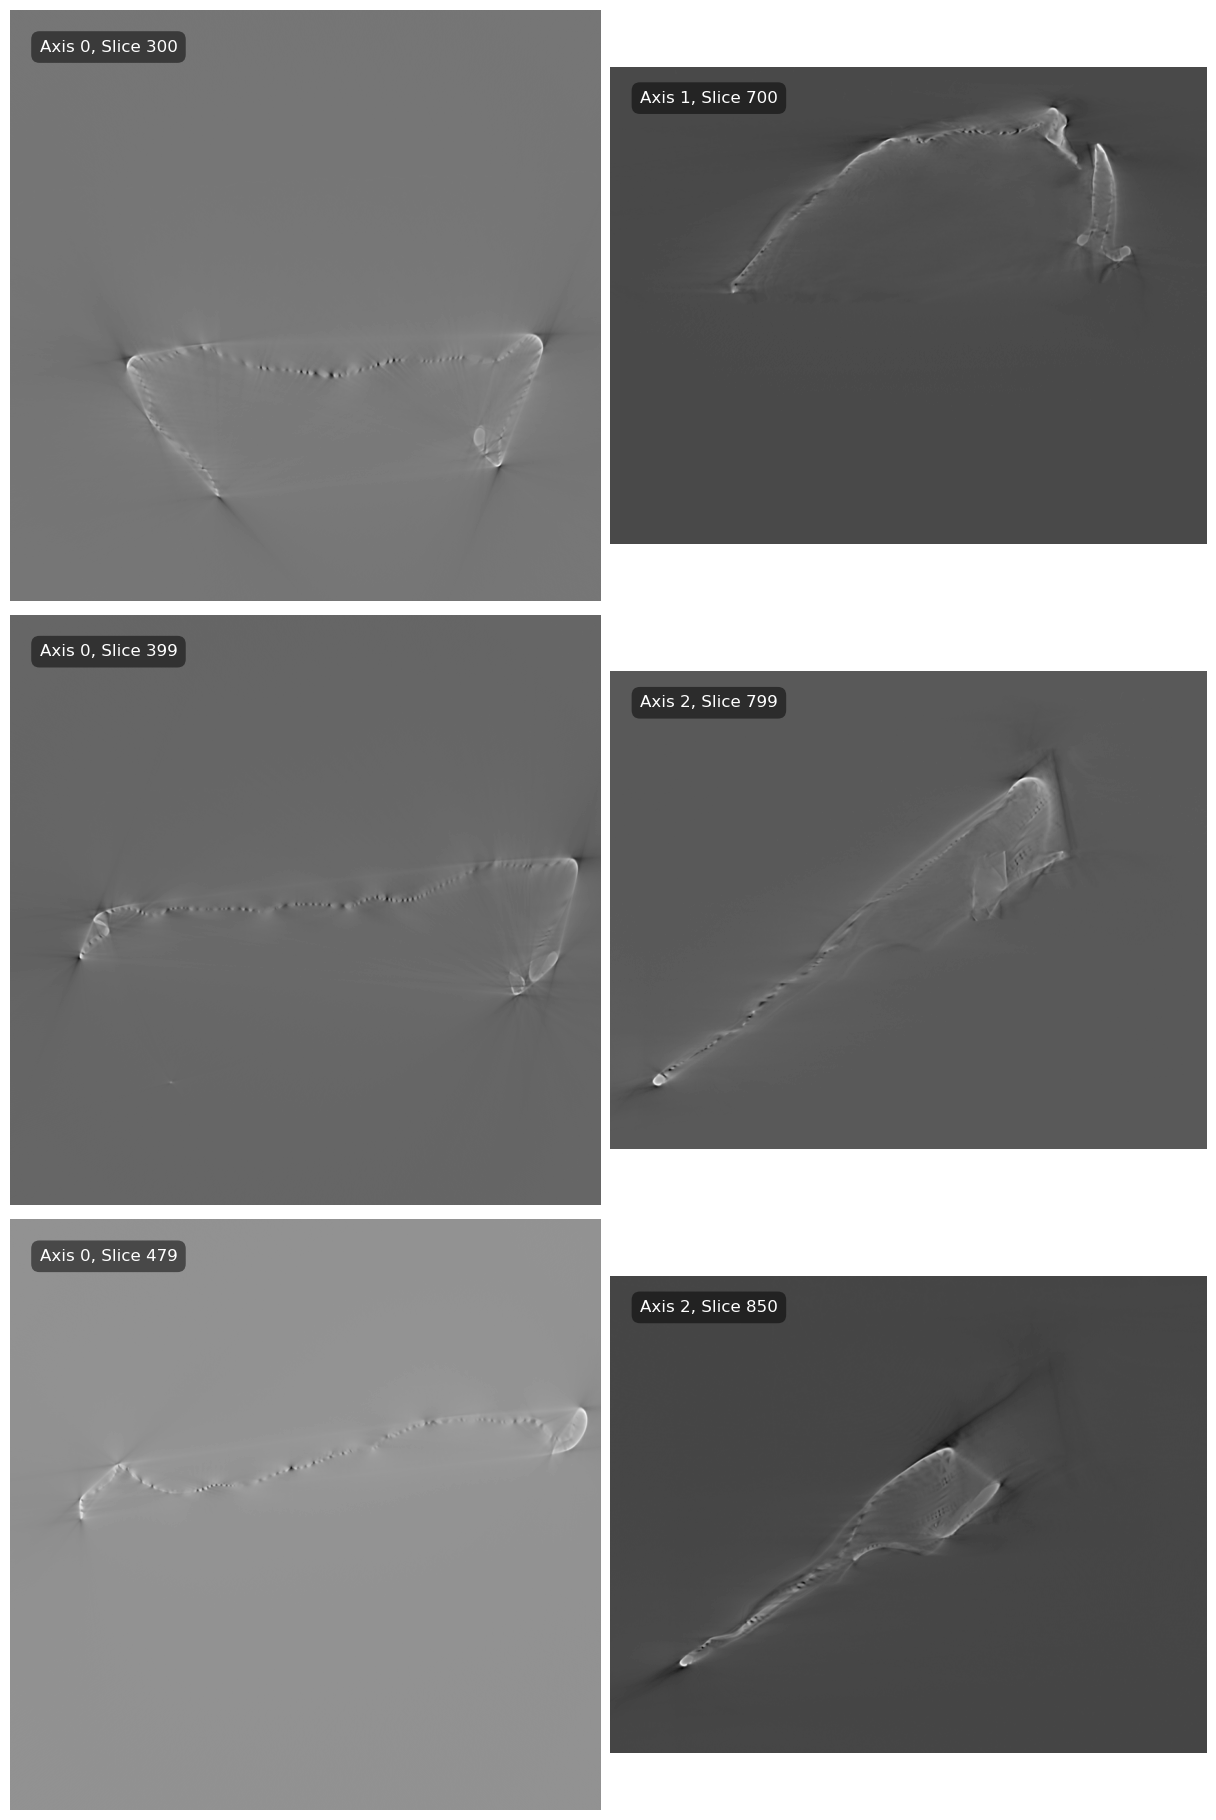

In [22]:
axis=2
slice_info = [[2,799], [2,850], [0,399], [0,300],[0,479],[1,700]]
slice_info = [[0,300], [1,700], [0,399], [2,799], [0,479], [2,850]]
rows=3
fig_scale=2
magnify=1.15
display_slices2(recon.as_array(), slice_info, rows=rows, cols=None, fig_scale=fig_scale, magnify=magnify, show=False)
# plt.savefig('plots/X20_full_initial_FDK.pdf')
# display_slices2(recon_bhc.as_array(), slice_info, rows=2, cols=None, fig_scale=fig_scale, magnify=magnify)

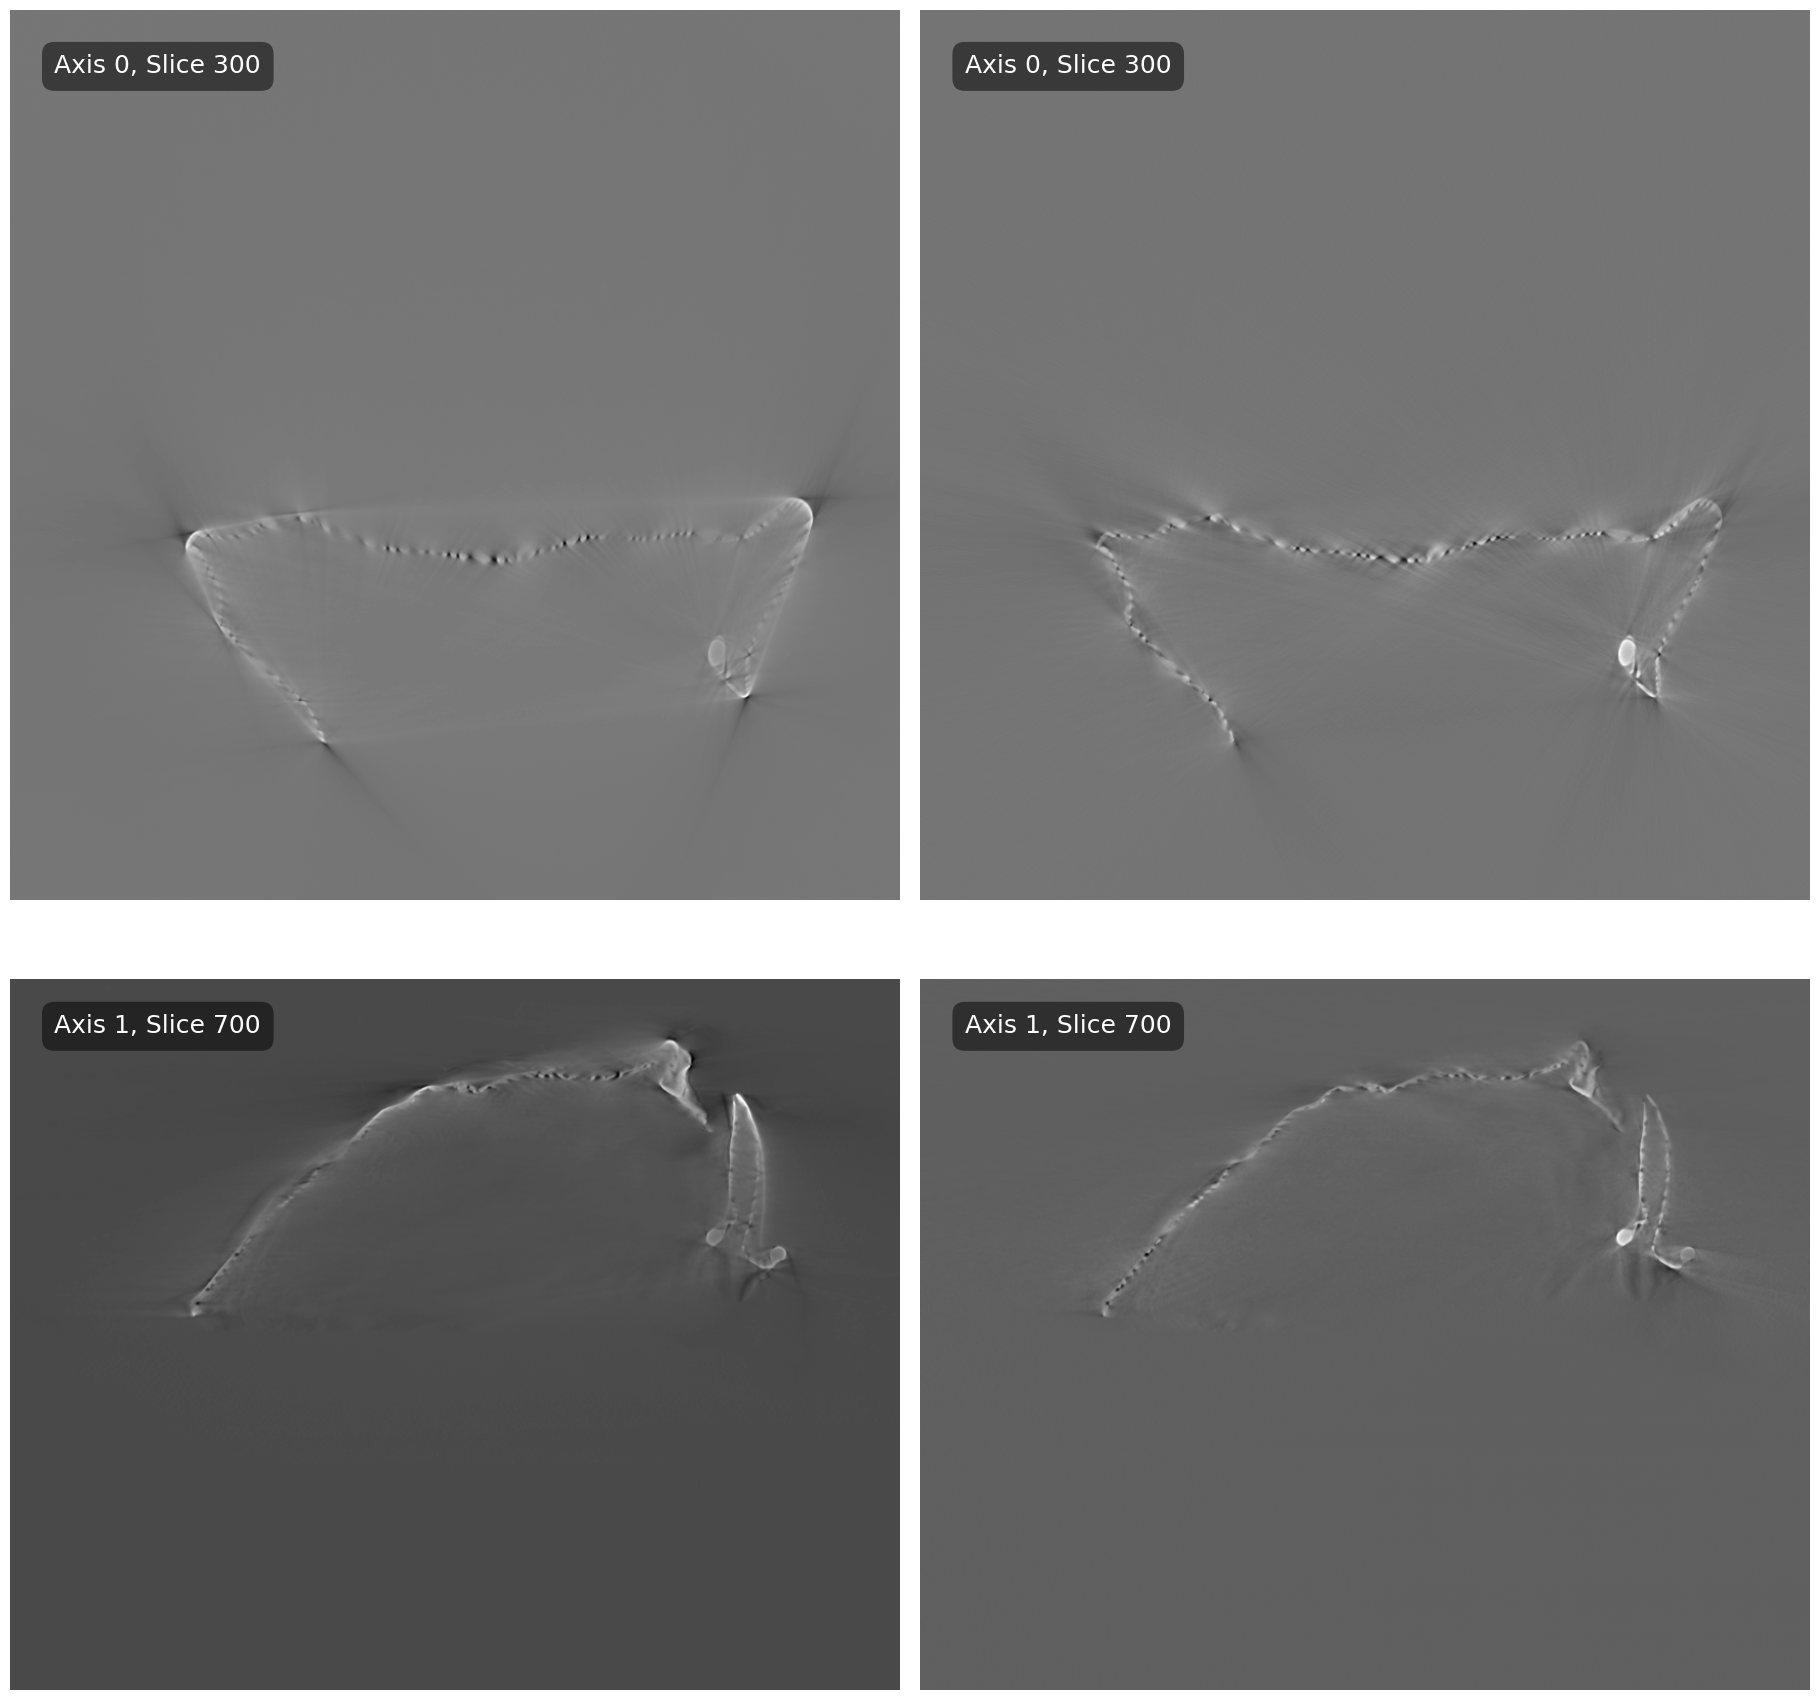

In [17]:
slice_info = [[0,300], [1,700]]fdk
fig_scale=3
magnify=1.15
display_slices3(recon.as_array(), recon_bhc.as_array(), slice_info, fig_scale=fig_scale, magnify=magnify, show=False)

In [18]:
np.exp(-3.4)

0.03337326996032608